## 6. Decision Trees and Ensemble Learning
Decision trees and tree-based ensamble algorithms

### 6.1 Credit risk scoring

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### 6.2 Data clearning and preparation

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [7]:
df.status = df.status.map({1:'ok', 2: 'default', 0: 'unk'})

In [8]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
cols = ['income','assets','debt']

for c in cols:
    df[c] = df[c].replace(to_replace=99999999, value = np.nan)

In [12]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [13]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size = .2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = .25, random_state = 11)

In [16]:
df_train.status = (df_train.status == 'default').astype(int)
df_val.status = (df_val.status == 'default').astype(int)
df_test.status = (df_test.status == 'default').astype(int)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values

del df_train['status']
del df_val['status']
del df_test['status']

In [17]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


### 6.3 Decision trees
- How a decision tree looks
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [18]:
## a decison tree is essentially a bunch of if-else statements

def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'okay'
    else:
        if client['assets'] > 6000:
            return 'okay'
        else:
            return'default'

In [19]:
xi = df_train.iloc[0].to_dict()
assess_risk(xi)

'okay'

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [21]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [22]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

In [23]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_predict = dt.predict_proba(X_val)[:,1]

In [24]:
roc_auc_score(y_val,y_predict)

0.667221670581967

In [25]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

We can see that the ROC AUC score for the validation data set is very low
and the ROC AUC score for the train data set is very high (almost perfect).
This means our model memorized the rules for the training data set, but failed to generalize.
The model overfit.
In order to correct we need to tune parameters such as "depth of tree" making the rules less specific.

In [26]:
dt = DecisionTreeClassifier(max_depth = 3)
dt_model=dt.fit(X_train, y_train)

y_predict = dt_model.predict_proba(X_val)[:,1]
print('val auc:', roc_auc_score(y_val,y_predict))

y_pred = dt_model.predict_proba(X_train)[:,1]
print('train auc:', roc_auc_score(y_train, y_pred))

val auc: 0.7389079944782155
train auc: 0.7761016984958594


In [27]:
dt = DecisionTreeClassifier(max_depth = 2)
dt_model=dt.fit(X_train, y_train)

y_predict = dt_model.predict_proba(X_val)[:,1]
print('val auc:', roc_auc_score(y_val,y_predict))

y_pred = dt_model.predict_proba(X_train)[:,1]
print('train auc:', roc_auc_score(y_train, y_pred))

val auc: 0.6685264343319367
train auc: 0.7054989859726213


In [28]:
from sklearn.tree import export_text

In [29]:
print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



### 6.4 Decision tree learning algorithm
- Finding the best split for 1 column
- Finding the best ssplit for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [30]:
data_small = [
    [8000,'default']
    ,[2000, 'default']
    ,[0,'default']
    ,[5000, 'ok']
    ,[5000, 'ok']
    ,[4000, 'ok']
    ,[9000, 'ok']
    ,[3000, 'default']
]

df_small = pd.DataFrame(data_small, columns = ['assets','status'])

In [31]:
df_small

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [32]:
df_small.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [33]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [34]:
from IPython.display import display

In [35]:
for T in Ts:
    print(T)
    df_left = df_small[df_small.assets <= T]
    df_right = df_small[df_small.assets >T]

    display(df_left)
    display(df_right)

    print()

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok



4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok



5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok



8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


For each split, we make the decision based on the max occurance. For example, with T=4000 df_right 3/4 values are "ok" so we will predict "ok" for T>4000.
This leads so a missclassifaction rate of 25%. We calculate this for the left as well. And then take an average of the two. The split with the lowest average missclassifcation rate, is the best split.

### 5.5 Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [36]:
for d in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d,auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.756
  10 -> 0.692
  15 -> 0.671
  20 -> 0.655
None -> 0.663


We can see that the best decision tree would have a max depth of 4,5,6. In practice, we might choose max_depth = 4 instead of 5 because this algorithm tends to overfit and a smaller tree is easier to see/understand.

In [37]:
for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train,y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        print('(%4s,%3d) -> %.3f' % (d,s,auc))

(   4,  1) -> 0.761
(   4,  2) -> 0.761
(   4,  5) -> 0.761
(   4, 10) -> 0.761
(   4, 15) -> 0.764
(   4, 20) -> 0.761
(   4,100) -> 0.756
(   4,200) -> 0.747
(   4,500) -> 0.680
(   5,  1) -> 0.767
(   5,  2) -> 0.767
(   5,  5) -> 0.768
(   5, 10) -> 0.762
(   5, 15) -> 0.773
(   5, 20) -> 0.774
(   5,100) -> 0.763
(   5,200) -> 0.759
(   5,500) -> 0.680
(   6,  1) -> 0.758
(   6,  2) -> 0.758
(   6,  5) -> 0.762
(   6, 10) -> 0.778
(   6, 15) -> 0.785
(   6, 20) -> 0.773
(   6,100) -> 0.776
(   6,200) -> 0.768
(   6,500) -> 0.680


We can output like above and look with our eyes/ write down on a piece of paper or we can output results to a dataframe.

In [38]:
scores = []

for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train,y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

In [39]:
df_scores = pd.DataFrame(scores, columns=['depth', 'leaf_sample','auc'])
df_scores.sort_values(by='auc',ascending=False)

,depth,leaf_sample,auc
22,6,15,0.785474
21,6,10,0.777803
24,6,100,0.776434
23,6,20,0.774279
14,5,20,0.774028
13,5,15,0.772723
25,6,200,0.768267
11,5,5,0.768173
10,5,2,0.766938
9,5,1,0.766496


In [40]:
df_scores_pivot = df_scores.pivot(index='leaf_sample',columns='depth',values='auc').round(3)

<Axes: xlabel='depth', ylabel='leaf_sample'>

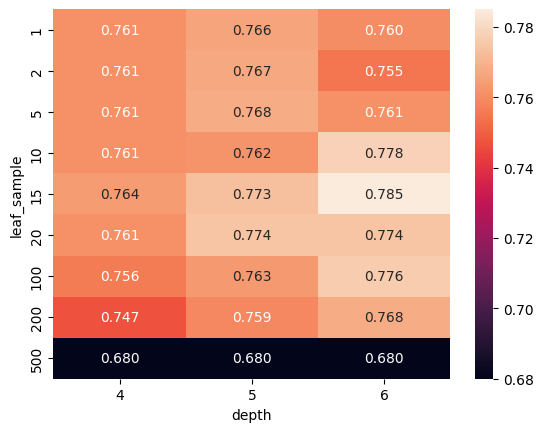

In [41]:
sns.heatmap(df_scores_pivot, annot=True,fmt='.3f')

Because our dataset is small we can find a few values of max_depth, and then iterate over the combinations of max_depth and min_samples_leaf. But maybe there was a combination of a max_depth we didn't choose and min_sample_leaf that has an even better auc. \
For example:

In [42]:
scores = []

for d in [4,5,6,7,8,9,10,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train,y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

df_scores = pd.DataFrame(scores, columns=['depth', 'leaf_sample','auc'])
df_scores.sort_values(by='auc',ascending=False).head()

,depth,leaf_sample,auc
58,10.0,15,0.789364
49,9.0,15,0.787929
50,9.0,20,0.787729
67,NaN,15,0.785867
22,6.0,15,0.785474


max_depth=10 and min_samples_leaf=15 actually has a better auc.\
In practice, that dataset might be huge so we can not possible iterate over all possible combinations of max_depth and min_samples_leaf. In practice, one parameter tuning methodoly is to find the best max_depth, set that as constant, and then find the best min_samples_leaf.

In [43]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### 6.6 Ensemables and random forest
- Board of experts
- Ensemble models
- Random forests - ensembling decision trees
- Runing random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [46]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [47]:
roc_auc_score(y_val, y_pred)

0.7823920466929839

In [48]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [49]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [50]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [51]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

As you can see above, everytime we retrain the model, we get different probabilities. This is because with 10 estimators, we give them a different subset of features every training bout to learn from. For reproduceability we fix the random_state.

In [52]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [53]:
scores = []
for n in range(10,201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train,y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [54]:
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])

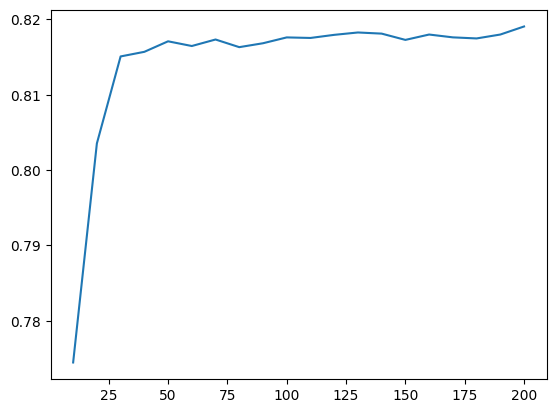

In [55]:
plt.plot(df_scores.n_estimators,df_scores.auc)

The model learns well up to 50 different trees, but after that the learning falls off. Not worth adding extra trees after 50.\
Now lets tune the other key parameters.

In [56]:
scores = []
for d in [5,10,15]:
    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d ,random_state=1)
        rf.fit(X_train,y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, n, auc))

In [57]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators','auc'])

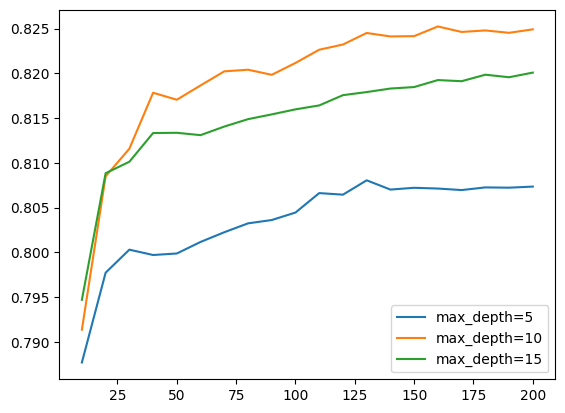

In [58]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators,df_subset.auc, label=f'max_depth={d}')
plt.legend()

We can see that max_depth parameter does matter here. We should set max_depth parameter to 10.

In [59]:
max_depth = 10

In [60]:
scores = []
for s in [1,3,5,10,50]:
    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators=n
                                    , max_depth=max_depth
                                    , min_samples_leaf=s
                                    , random_state=1)
        rf.fit(X_train,y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((s, n, auc))

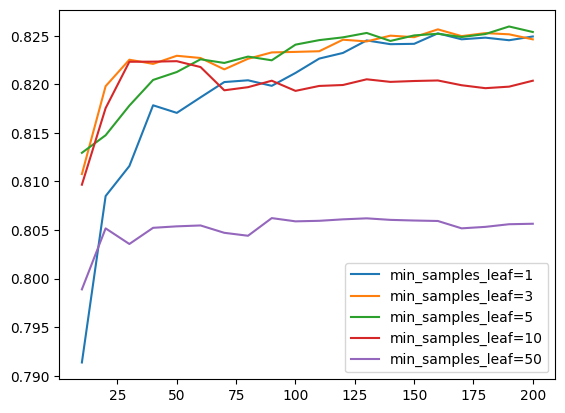

In [61]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf','n_estimators','auc'])
for s in [1,3,5,10,50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators,df_subset.auc, label=f'min_samples_leaf={s}')
plt.legend()

In [62]:
min_samples_leaf=5

In [63]:
rf = RandomForestClassifier(n_estimators=100
                                    , max_depth=max_depth
                                    , min_samples_leaf=min_samples_leaf
                                    , random_state=1)
rf.fit(X_train,y_train)
    
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

In [64]:
auc

0.8240809135162626

### 6.7 Gradient Boosting 
- Gradient boosting vs random forest
- Installign XGboost
- Training the first model
- Performance monitoring
- Parsing xgboosts's monitoring output

In [65]:
#!pip3 install xgboost

In [66]:
import xgboost as xgb

In [67]:
features=list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train,label=y_train, feature_names=features)

In [68]:
dval = xgb.DMatrix(X_val,label=y_val, feature_names=features)

In [69]:
xgb_params = {
    'eta': 0.3
    , 'max_depth': 6
    , 'min_child_weight': 1
    , 'objective': 'binary:logistic'
    , 'nthread': 8
    , 'seed': 1
    , 'verbosity': 1    
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [70]:
y_pred = model.predict(dval)

In [71]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [72]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [73]:
xgb_params = {
    'eta': 0.3
    , 'max_depth': 6
    , 'min_child_weight': 1
    , 'objective': 'binary:logistic'
    , 'nthread': 8
    , 'seed': 1
    , 'verbosity': 1
    , 'eval_metric': 'auc'
    
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5 ,num_boost_round=200)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [74]:
%%capture output

xgb_params = {
    'eta': 0.3
    , 'max_depth': 6
    , 'min_child_weight': 1
    , 'objective': 'binary:logistic'
    , 'nthread': 8
    , 'seed': 1
    , 'verbosity': 1
    , 'eval_metric': 'auc'
    
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5 ,num_boost_round=200)

In [75]:
s = output.stdout

In [76]:
s

'[0]\ttrain-auc:0.86730\tval-auc:0.77938\n[5]\ttrain-auc:0.93086\tval-auc:0.80858\n[10]\ttrain-auc:0.95447\tval-auc:0.80851\n[15]\ttrain-auc:0.96554\tval-auc:0.81334\n[20]\ttrain-auc:0.97464\tval-auc:0.81729\n[25]\ttrain-auc:0.97953\tval-auc:0.81686\n[30]\ttrain-auc:0.98579\tval-auc:0.81543\n[35]\ttrain-auc:0.99011\tval-auc:0.81206\n[40]\ttrain-auc:0.99421\tval-auc:0.80922\n[45]\ttrain-auc:0.99548\tval-auc:0.80842\n[50]\ttrain-auc:0.99653\tval-auc:0.80918\n[55]\ttrain-auc:0.99765\tval-auc:0.81114\n[60]\ttrain-auc:0.99817\tval-auc:0.81172\n[65]\ttrain-auc:0.99887\tval-auc:0.80798\n[70]\ttrain-auc:0.99934\tval-auc:0.80870\n[75]\ttrain-auc:0.99965\tval-auc:0.80555\n[80]\ttrain-auc:0.99979\tval-auc:0.80549\n[85]\ttrain-auc:0.99988\tval-auc:0.80374\n[90]\ttrain-auc:0.99993\tval-auc:0.80409\n[95]\ttrain-auc:0.99996\tval-auc:0.80548\n[100]\ttrain-auc:0.99998\tval-auc:0.80509\n[105]\ttrain-auc:0.99999\tval-auc:0.80629\n[110]\ttrain-auc:1.00000\tval-auc:0.80637\n[115]\ttrain-auc:1.00000\tval-au

In [77]:
s.strip()

'[0]\ttrain-auc:0.86730\tval-auc:0.77938\n[5]\ttrain-auc:0.93086\tval-auc:0.80858\n[10]\ttrain-auc:0.95447\tval-auc:0.80851\n[15]\ttrain-auc:0.96554\tval-auc:0.81334\n[20]\ttrain-auc:0.97464\tval-auc:0.81729\n[25]\ttrain-auc:0.97953\tval-auc:0.81686\n[30]\ttrain-auc:0.98579\tval-auc:0.81543\n[35]\ttrain-auc:0.99011\tval-auc:0.81206\n[40]\ttrain-auc:0.99421\tval-auc:0.80922\n[45]\ttrain-auc:0.99548\tval-auc:0.80842\n[50]\ttrain-auc:0.99653\tval-auc:0.80918\n[55]\ttrain-auc:0.99765\tval-auc:0.81114\n[60]\ttrain-auc:0.99817\tval-auc:0.81172\n[65]\ttrain-auc:0.99887\tval-auc:0.80798\n[70]\ttrain-auc:0.99934\tval-auc:0.80870\n[75]\ttrain-auc:0.99965\tval-auc:0.80555\n[80]\ttrain-auc:0.99979\tval-auc:0.80549\n[85]\ttrain-auc:0.99988\tval-auc:0.80374\n[90]\ttrain-auc:0.99993\tval-auc:0.80409\n[95]\ttrain-auc:0.99996\tval-auc:0.80548\n[100]\ttrain-auc:0.99998\tval-auc:0.80509\n[105]\ttrain-auc:0.99999\tval-auc:0.80629\n[110]\ttrain-auc:1.00000\tval-auc:0.80637\n[115]\ttrain-auc:1.00000\tval-au

In [78]:
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86730\tval-auc:0.77938'

In [79]:
line.split('\t')

['[0]', 'train-auc:0.86730', 'val-auc:0.77938']

In [80]:
num_iter, train_auc, val_auc = line.split('\t')

In [81]:
num_iter

'[0]'

In [82]:
int(num_iter.strip('[]'))

0

In [83]:
float(train_auc.split(':')[1])

0.8673

In [84]:
float(val_auc.split(':')[1])

0.77938

In [85]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        num_iter = int(it_line.strip('[]'))
        train_auc = float(train_line.split(':')[1])
        val_auc = float(val_line.split(':')[1])

        results.append((num_iter,train_auc,val_auc))
    
    columns = ['num_iter','train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns = columns)
    return df_results

In [86]:
df_score = parse_xgb_output(output)

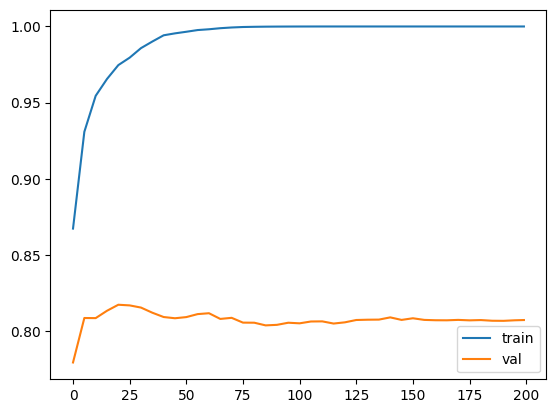

In [87]:
plt.plot(df_score.num_iter, df_score.train_auc, label = 'train')
plt.plot(df_score.num_iter, df_score.val_auc, label = 'val')
plt.legend()

### 6.8 XGBoost parameter tuning
Tuning the following parameters
- `eta`
- `max_depth`
- `min_child_weight`

In [88]:
scores = {}

In [89]:
%%capture output

### keep rerunning this cell block to get auc for different values of eta, then MD, then MCW for tuning.
xgb_params = {
    'eta': 0.01
    , 'max_depth': 6
    , 'min_child_weight': 30
    , 'objective': 'binary:logistic'
    , 'nthread': 8
    , 'seed': 1
    , 'verbosity': 1
    , 'eval_metric': 'auc'
    
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5 ,num_boost_round=200)

In [90]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [91]:
list(scores.keys())

['min_child_weight=30']

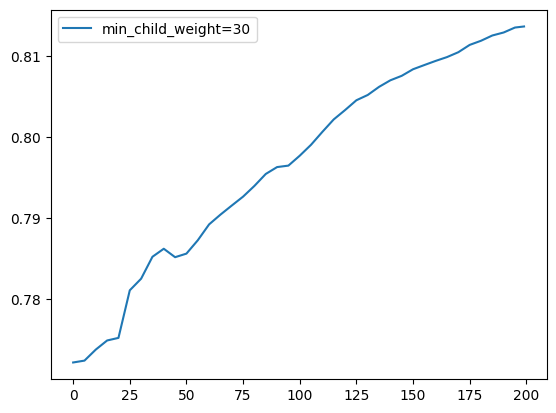

In [92]:
etas = list(scores.keys())
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
plt.legend()

In [93]:
### we tune eta, then max_depth, then min_child_weight in that order. eta = .1 has the best auc with small number of iter so thats the winner
eta = 0.1
### I'll reuse and rerun the code above for tuning

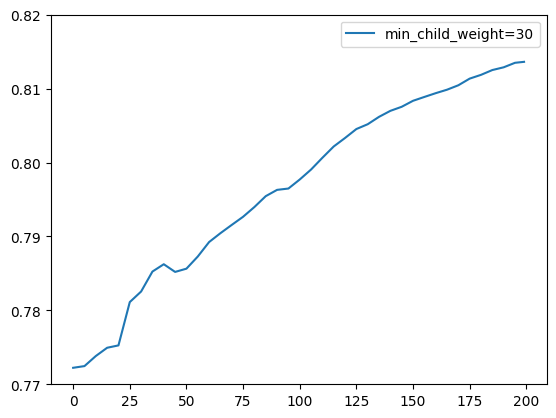

In [94]:
maxdepths = list(scores.keys())
for maxdepth in maxdepths:
    df_score = scores[maxdepth]
    plt.plot(df_score.num_iter, df_score.val_auc, label = maxdepth)
plt.ylim(.77,.82)
plt.legend()

In [95]:
max_depth = 6

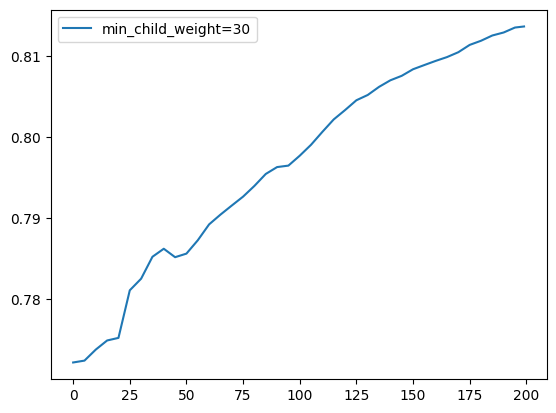

In [96]:
minweights = list(scores.keys())
for minweight in minweights:
    df_score = scores[minweight]
    plt.plot(df_score.num_iter, df_score.val_auc, label = minweight)
plt.legend()

In [97]:
min_child_weight = 10
num_boost_round = 200

In [98]:
### final tuned model
xgb_params = {
    'eta': 0.01
    , 'max_depth': 6
    , 'min_child_weight': 10
    , 'objective': 'binary:logistic'
    , 'nthread': 8
    , 'seed': 1
    , 'verbosity': 1
    , 'eval_metric': 'auc'
    
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

### 6.9 Selecting the final model
- choosing between xgboost, random foerst, and decision tree
- Training the final model with full data
- Saving the model

In [111]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [114]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7852498123077667

In [101]:
rf = RandomForestClassifier(n_estimators=100
                                    , max_depth=max_depth
                                    , min_samples_leaf=min_samples_leaf
                                    , random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=1)

In [102]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8129767988181444

In [103]:
xgb_params = {
    'eta': 0.01
    , 'max_depth': 6
    , 'min_child_weight': 10
    , 'objective': 'binary:logistic'
    , 'nthread': 8
    , 'seed': 1
    , 'verbosity': 1
    , 'eval_metric': 'auc'
    
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [104]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8159163013731807

In [105]:
### here xgboost slightly beats out RF so we pick that as our final model and train it on df_full_train
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype(int).values
del df_full_train['status']

In [106]:
dicts_full_train = df_full_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train=dv.fit_transform(dicts_full_train)

dicts_test = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(dicts_test)


In [107]:
dfulltrain = xgb.DMatrix(X_full_train, label = y_full_train, feature_names = list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [108]:
xgb_params = {
    'eta': 0.01
    , 'max_depth': 6
    , 'min_child_weight': 10
    , 'objective': 'binary:logistic'
    , 'nthread': 8
    , 'seed': 1
    , 'verbosity': 1
    , 'eval_metric': 'auc'
    
}
final_model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [109]:
y_pred = final_model.predict(dtest)

In [110]:
roc_auc_score(y_test,y_pred)

0.8174576022677288